# Machine Learning Lab 6 - Arailym Kaiyrova

### Exercise 1: Generalized Linear Models with Scikit Learn

In [404]:
import numpy as np
import math
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import random

In this task, it was required to use 'wine quality' dataset

In [697]:
df_wine = pd.DataFrame(pd.read_csv('datasets/winequality-red.csv', delimiter = ";"))
df_wine = df_wine.dropna()
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Then data was spiltted into train and test sets according to ratio 8:2

In [698]:
def split_train_test(df, frac):
    train=df.sample(frac=frac,random_state=200) #random state is a seed value
    test=df.drop(train.index)
    return train, test

train, test = split_train_test(df_wine, 0.8) 

Then data was separated into input, and output components 

In [699]:
def return_data_components(trainset, testset, target):
    return trainset.drop([target], axis=1).to_numpy(),\
            trainset[target].to_numpy(),\
            testset.drop([target], axis=1).to_numpy(),\
            testset[target].to_numpy()  

train_x, train_y, test_x, test_y = return_data_components(train, test, 'quality')

The main part of this Exercise is to learn Stochastic Gradient Descent (SGD) model according to given hyperparameters.\
Hyperparameters that were used in this task are learning rate (eta0 in SGD regressor), regularization constant lambda(alpha in SGD regressor), and maximum iteration size.\
Also, in case of 'least square regression without regularization' 'alpha' is set to zero.\
Parameter 'l1_ratio' identifies the ratio of lasso regularization, if l1_ratio quals 1, then the defined model is 'Lasso Regression'. If it equals 0, the the model is 'Ridge Regression'.\
\
After defining the model, data is trained, and mean_square_error is calculated to predicted train and test data:

In [906]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

def model_train(model_type, params, train_x, train_y, test_x, test_y):
    coef_init = [0]*train_x.shape[1]
    alpha, learning_rate, i_max = params
    # if model type is 'least square', regularization ter is set to zero
    if model_type=='least square': alpha = 0
    ratio = 1 if model_type=='lasso' else 0
    model = linear_model.SGDRegressor(fit_intercept=True, learning_rate='constant',
                                    l1_ratio=ratio, random_state=100, 
                                    alpha=alpha, eta0=learning_rate, max_iter=i_max)\
                                    .fit(train_x, train_y, coef_init=coef_init, intercept_init=[0])


    err_train = mean_squared_error(model.predict(train_x), train_y)
    err = mean_squared_error(model.predict(test_x), test_y)
    return err_train, err


As it was reuired in task requirements, three sets of hyperparameter combination was trained was used for defining model for each model type. Then the train, and test errors were plotted in a scatter plot.\

It can be seen that for regularized models (Lasso and Ridge regression) the difference between test and train error is smaller, which shows that there is less 'overfitting' for these models

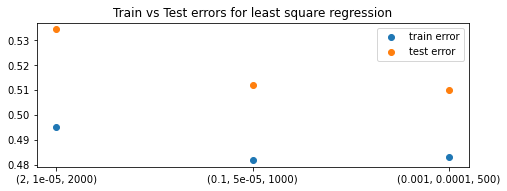

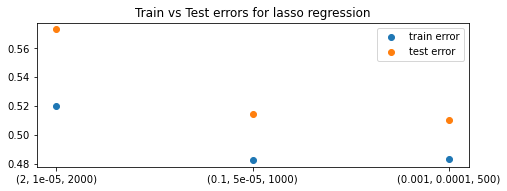

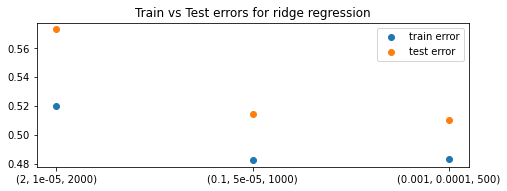

In [907]:
model_types = ['least square', 'lasso', 'ridge']
param_set = [(2, 0.00001, 2000), (0.1, 0.00005, 1000), (0.001, 0.0001, 500)]
param_str = [str(x) for x in param_set]

for model_type in model_types:
    train_res, test_res = [], []
    for params in param_set:
        mse_train, mse_test = model_train(model_type, params, train_x, train_y, test_x, test_y)
        train_res.append(mse_train)
        test_res.append(mse_test)
    fig = plt.figure()
    ax=fig.add_axes([0,0,1,0.5])
    plt.title('Train vs Test errors for '+model_type+' regression')
    ax.scatter(param_str, train_res, label='train error')
    ax.scatter(param_str, test_res, label='test error')
    ax.legend()


Next step is to train the linear regression models using Grid Seach CV, and the set up hyperparameters that was used are 'alpha', and 'eta0', and size of K that used for K-Cross_validation is 4. This function returns mean test scores for each hyperparameter combination in parameter set, and set of best parameter combination.

In [944]:
from sklearn.model_selection import GridSearchCV

def model_train_cv(model_type, train_x, train_y):
    parameters = {'eta0':[0.0001, 0.00005, 0.00001], 'alpha':[0, 0.0000001, 0.8], 'max_iter':[1000]}
    ratio = 1 if model_type=='lasso' else 0
    
    if model_type=='least square': parameters['alpha'] = [0]
    lr = linear_model.SGDRegressor(fit_intercept=True, learning_rate='constant',
                                    l1_ratio=ratio, random_state=100)
    
    model = GridSearchCV(lr, parameters,scoring='neg_mean_squared_error',cv=4).fit(train_x, train_y,
                                                                    coef_init=[0]*train_x.shape[1], intercept_init=[0])

    return model.cv_results_['mean_test_score'], model.cv_results_['params'], model.best_params_



Grid Search CV model that defined above was trained for all model types, and the mean square errors were plotted for each hyperparameter combination

<ipython-input-951-a232b344777b>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(param_str, rotation=-10)
<ipython-input-951-a232b344777b>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(param_str, rotation=-10)
<ipython-input-951-a232b344777b>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(param_str, rotation=-10)


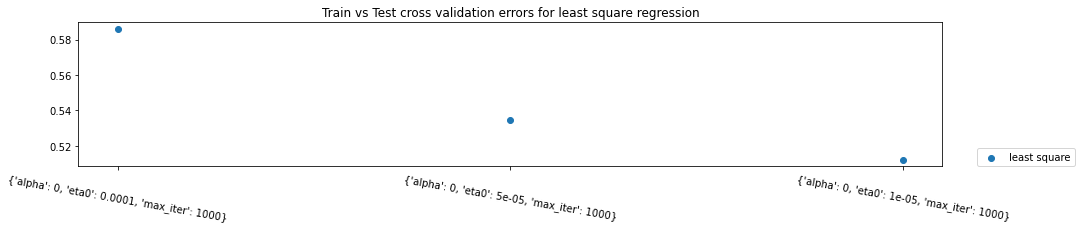

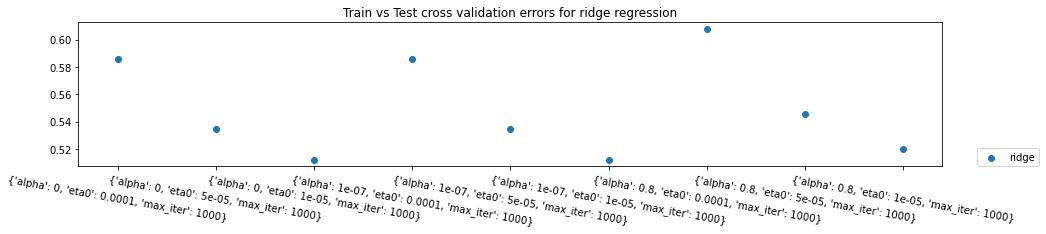

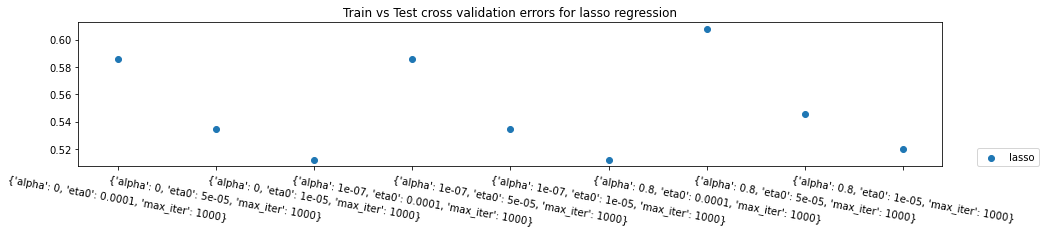

In [951]:
model_types = ['least square','ridge', 'lasso']
best_params = []



for model_type in model_types:
    fig = plt.figure()
    ax=fig.add_axes([0,0,2,0.5])
    train_res, param_set, best_param = model_train_cv(model_type, train_x, train_y)
    #Error values are transformed to positive since moder calculates negative MSE scores
    train_res = param_str = [abs(x) for x in train_res]
    best_params.append(best_param)
    param_str = [str(x) for x in param_set]
    
    
    plt.title('Train vs Test cross validation errors for '+model_type+' regression')
    ax.scatter(param_str, train_res, label=model_type)
    ax.set_xticklabels(param_str, rotation=-10)
    ax.legend(loc=(1.04,0))

The 'evaluate_testset' fuction below trains the model according to selected best parameters, and calculates their train and tes errors

In [948]:
def evaluate_testset(model_type, best_params, train_x, train_y, test_x, test_y):
    coef_init = [0]*train_x.shape[1]
    alpha, learning_rate, i_max = params
    if model_type=='least square': alpha = 0
    ratio = 1 if model_type=='lasso' else 0
    model = linear_model.SGDRegressor(fit_intercept=True, learning_rate='constant',
                                    l1_ratio=ratio, random_state=200, 
                                    alpha=best_params['alpha'], eta0=best_params['eta0'], max_iter=best_params['max_iter'])\
                                    .fit(train_x, train_y, coef_init=coef_init, intercept_init=[0])


    err_train = mean_squared_error(model.predict(train_x), train_y)
    err = mean_squared_error(model.predict(test_x), test_y)
    return err_train, err

for i in range(len(model_types)):
    train_err, test_err = evaluate_testset(model_types[i], best_params[i], train_x, train_y, test_x, test_y)
    print('Best parameter combination for ',model_types[i], 'is:', best_params[i], 'and their train and test errors are', train_err, test_err)

Best parameter combination for  least square is: {'alpha': 0, 'eta0': 1e-05, 'max_iter': 1000} and their train and test errors are 0.4941140518544253 0.5325224090193813
Best parameter combination for  ridge is: {'alpha': 0, 'eta0': 1e-05, 'max_iter': 1000} and their train and test errors are 0.4941140518544253 0.5325224090193813
Best parameter combination for  lasso is: {'alpha': 0, 'eta0': 1e-05, 'max_iter': 1000} and their train and test errors are 0.4941140518544253 0.5325224090193813


### Exercise 2: Higher Order Polynomial Regression

For this task D1 dataset was created according to criteria in Exercise 0: Dataset Preprocessing, part 1.

In [843]:
#Generating input vactor X
mean, std, N = 1, 0.05, 100
X = np.random.normal(mean, std, size = (N,1))

#Generating target vector Y
Y = [(1.3*np.square(x))+(4.8*x)+8+random.random() for x in X]

#### Task A

'learn_poly_regression' fuction below calculates the optimized model parameters for polynomimal regression of degree d

In [952]:
#Polynomial regression of degree d
from sklearn.preprocessing import PolynomialFeatures
from numpy.linalg import inv

def learn_poly_regression(x, y, d):
    poly = PolynomialFeatures(d)
    X = poly.fit_transform(x)
    c = np.matmul(X.T, X)
    d = np.matmul(X.T, y)
    theta = np.matmul(inv(c), d)
    return theta

Different degrees of d was tried for polynomial regression model above, and actual values were plotter against predictid values, and it can be seen that polynomial degrees from 1 to 5 fits the data well, but starting from degree 6, it starts overfitting

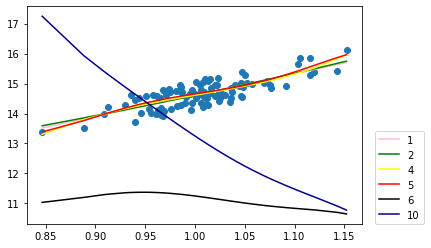

In [958]:
def predict_regression(X,theta):
    return np.matmul(X, theta)

degrees = [1, 2, 4, 5, 6, 10]
colors = ['pink', 'green', 'yellow', 'red', 'black', 'darkblue']
sorted_X = sorted(X)
plt.scatter(X,Y)

for i in range(len(degrees)):
    d = degrees[i]
    poly = PolynomialFeatures(d)
    theta = learn_poly_regression(X, Y, d)
    y_pred = np.matmul(poly.fit_transform(sorted_X), theta)
    plt.plot(sorted_X,y_pred,'y', color = colors[i], label = d)
plt.legend(loc=(1.04,0))

#### Task B

Next, polymial degree was set to zero, and data was trained on different regularization values

In [846]:
def learn_poly_regression_regularization(X, y, lambd):    
    N, M = X.shape

    c = np.matmul(X.T, X) + (N*lambd*np.identity(M))
    d = np.matmul(X.T, y)
    theta = np.matmul(inv(c), d)
    return theta

If data was oveerfitting for degree 10 in above task, with regularization the model can be fitted well for good choice of lamda. And from the plot below, it can be seen that for choosen degree of polymonial, lambda constants between (0, 0.01) prevents the model from underfitting

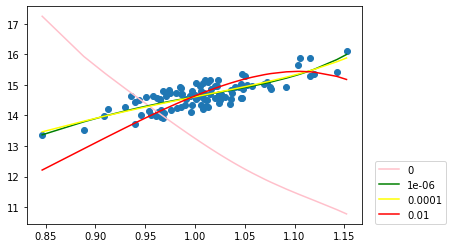

In [847]:
lambdas = [0, 0.000001, 0.0001, 0.01]
colors = ['pink', 'green', 'yellow', 'red', 'black', 'darkblue']

poly = PolynomialFeatures(10)
X_poly = poly.fit_transform(X) 
plt.scatter(X,Y)


for i in range(len(lambdas)):
    lambd = lambdas[i]   
    theta = learn_poly_regression_regularization(X_poly, Y, lambd)
    y_pred = np.matmul(poly.fit_transform(sorted_X), theta)
    plt.plot(sorted_X,y_pred,'y', color = colors[i], label = lambd)
plt.legend(loc=(1.04,0))

### Exercise 3: Implementing Coordinate Descent

In this task again 'wine quality' data was used, however, bias column for the dataset was added

In [848]:
train_x = np.column_stack((np.ones((train_x.shape[0],1)),train_x))
test_x = np.column_stack((np.ones((test_x.shape[0],1)),test_x))

Before implementing 'Cordinate descent', I used Gradient descent algoritm that I implemented in previous assignments to be able to compare results

In [865]:
def GSD(X_train, Y_train, i_max, r, X_test, Y_test):
    teta = [0]*X_train.shape[1]
    Y_PRED = np.matmul(X_train, teta)
    diff = np.subtract(Y_train, Y_PRED)
    L = np.dot(diff.T, diff)
    loss = [L]
    RMSE = []
    
    for i in range(i_max):
        #Gradient of loss function
        grad = (-2/len(Y_train)*np.matmul(X_train.transpose(), diff))
        #Updating model parameters
        teta = np.subtract(teta, r*grad)
        #Calculating RMSE for current teta and adding it to RMSE vector
        y_pred_test = np.matmul(X_test, teta)
        RMSE.append(np.sum((np.subtract(Y_test, y_pred_test))**2)/Y_test.shape[0])
        
        L_PREV = L
        Y_PRED = np.matmul(X_train, teta)
        diff = np.subtract(Y_train, Y_PRED)
        L = np.dot(diff.T, diff)
        loss.append(L)
        if L_PREV - L <= 0.001: break #convergence criteria
    print('Data converged after',i, "iterations")
    return teta, loss, RMSE

In [874]:
r, i_max = 0.0001, 1000
teta_wine_gsd, loss_wine_gsd, rmse_wine_gsd = GSD(train_x, train_y, i_max, r, test_x, test_y)
print('Latest error square value:',rmse_wine_gsd[-1])

Data converged after 999 iterations
Latest error square value: 0.572358304992796


And mse square errors against iterations were plotted for GDS:

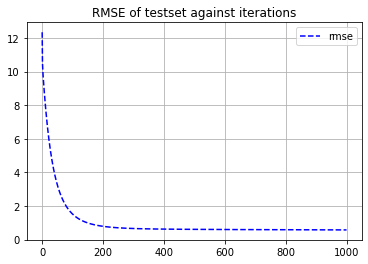

In [875]:
def plot_rmse_convergence(rmse):
    plt.plot(range(len(rmse)), rmse, 'b--', label='rmse')
    plt.title('RMSE of testset against iterations')
    plt.grid()
    plt.legend()
    plt.show()
    
plot_rmse_convergence(rmse_wine_gsd)

The components necessary for Cordinate Descent implementation are gradient function g, and loss function f

In [876]:
def g(X, Y, theta, m):
    num = np.dot(np.subtract(Y, np.matmul(np.delete(X, m, 1), theta[:m]+theta[m+1:])).T, X[:,m])
    denum = np.dot(X[:,m].T, X[:,m])
    return num/denum

In [877]:
def f(X, Y, theta):
    Y_PRED = np.matmul(X, theta)
    diff = np.subtract(Y, Y_PRED)
    L = np.dot(diff.T, diff)
    return L   

Then Coordinate Descent was implemted according to Fig.1 in Exercise Sheet, where during each iteration, each model parameter is also update iteratively based on results from previously updated model parameters:

In [1003]:
def CD(X_train, Y_train, i_max, X_test, Y_test):
    theta = [0]*X_train.shape[1]
    L = f(X_train, Y_train, theta)
    loss = [L]
    RMSE = []    
    thetas = [theta]
    
    for i in range(i_max):
        theta_curr = [item for item in theta]
        
        for m in range(len(theta)):
            theta_curr[m] = g(X_train, Y_train, theta_curr, m)
        
        theta = theta_curr
        thetas.append(theta)

        L_PREV = L
        L = f(X_train, Y_train, theta)
        loss.append(L)
        
        #Calculating RMSE for current teta and adding it to RMSE vector
        y_pred_test = np.matmul(X_test, theta)
        RMSE.append(np.sum((np.subtract(Y_test, y_pred_test))**2)/Y_test.shape[0])
        
        if L_PREV - L <= 0.001: break #convergence criteria
    print('Data converged after',i, "iterations")
    return theta, loss, RMSE, thetas

In [1004]:
i_max = 2000
teta_wine_cd, loss_wine_cd, rmse_wine_cd, thetas_cd = CD(train_x, train_y, i_max, test_x, test_y)
print('Latest error square value:',rmse_wine_cd[-1])

Data converged after 1321 iterations
Latest error square value: 0.42366056069607155


If compare the mse convergence for CD with GSD, it can be easily noticed that the values of CD converges faster, and shows better results

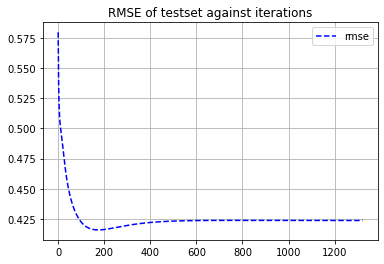

In [1005]:
plot_rmse_convergence(rmse_wine_cd)

Then history of model parameters were plotted against iterations

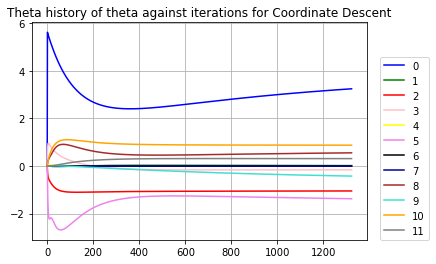

In [1006]:
def plot_theta_hist(thetas, title):
    thetas_np = np.array(thetas)
    colors = ['blue', 'green', 'red', 'pink', 'yellow', 'violet', 'black', 'darkblue', 'brown', 'turquoise', 'orange', 'gray']
    for i in range(thetas_np.shape[1]):
        plt.plot(range(thetas_np.shape[0]), thetas_np[:,i], label=i, color = colors[i])
        plt.title(title)
    plt.grid()
    plt.legend(loc=(1.04,0))
    plt.show()
    
plot_theta_hist(thetas_cd, 'Theta history of theta against iterations for Coordinate Descent')    
    
    

Similar Coordinate descent algorithm was implemented, but adding L1 regularization technique according to given value of lambda. That's why, loss and gradient functions are also a bit different from non-regularized regression model

In [1007]:
def f_l1(X, Y, theta, lambd):
    Y_PRED = np.matmul(X, theta)
    diff = np.subtract(Y, Y_PRED)
    L = np.dot(diff.T, diff) + lambd*np.linalg.norm(theta)
    return L

In [1008]:
def g_l1(X, Y, theta, m, lambd):
    num = np.dot(np.subtract(Y, np.matmul(np.delete(X, m, 1), theta[:m]+theta[m+1:])).T, X[:,m])
    denum = np.dot(X[:,m].T, X[:,m])
    x = num/denum
    e = (lambd/2)/denum
    if x>e: return x-e
    elif abs(x)<=e: return 0
    return x+e

In [1010]:
def CD_l1(X_train, Y_train, i_max, X_test, Y_test, lambd):
    theta = [0]*X_train.shape[1]
    L = f_l1(X_train, Y_train, theta, lambd)
    loss = [L]
    RMSE = []   
    thetas = [theta]
    
    for i in range(i_max):
        theta_curr = [item for item in theta]
        
        for m in range(len(theta)):
            theta_curr[m] = g_l1(X_train, Y_train, theta_curr, m, lambd)
        
        theta = theta_curr
        thetas.append(theta)

        L_PREV = L
        L = f_l1(X_train, Y_train, theta, lambd)
        loss.append(L)
        
        #Calculating RMSE for current teta and adding it to RMSE vector
        y_pred_test = np.matmul(X_test, theta)
        RMSE.append(np.sum((np.subtract(Y_test, y_pred_test))**2)/Y_test.shape[0])
        
        if L_PREV - L <= 0.001: break #convergence criteria
    print('Data converged after',i, "iterations")
    return theta, loss, RMSE, thetas

In [1011]:
i_max = 2000
teta_wine_cd_l1, loss_wine_cd_l1, rmse_wine_cd_l1, thetas_cd_l1 = CD_l1(train_x, train_y, i_max, test_x, test_y, 2)
print('Latest error square value:',rmse_wine_cd_l1[-1])

Data converged after 421 iterations
Latest error square value: 0.4285424393539534


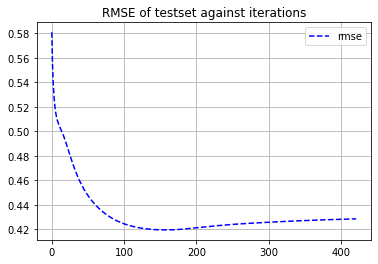

In [1012]:
plot_rmse_convergence(rmse_wine_cd_l1)

Then again history of model parameters were plotted against iterations

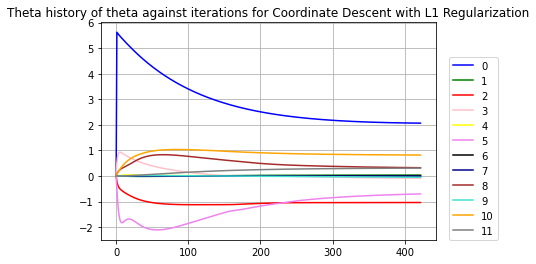

In [1013]:
plot_theta_hist(thetas_cd_l1, 'Theta history of theta against iterations for Coordinate Descent with L1 Regularization')


If compare two Coordinate descent algorithms, from the model using 'regularization' converges faster than unregularized model, which converged only after 1300 iterations, while L1 model converged after 421 iterations.\
\
Also, from the graphsn it can be seen that the values of model parameters also converges to the final value faster, and in more constant manner, while for unregularized model, there are higher fluctuations in the behaviour of parameter value change until it reaches the desired output.

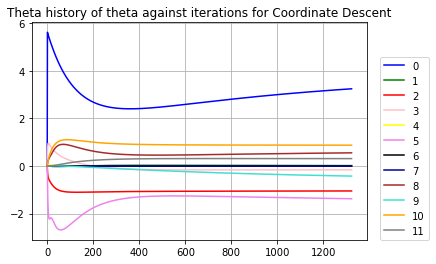

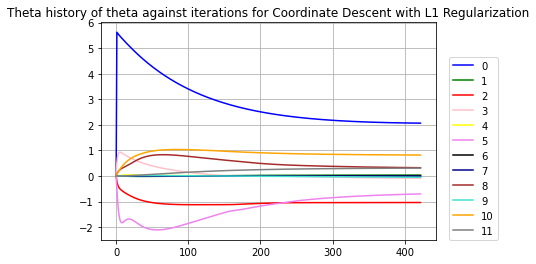

In [1015]:
plot_theta_hist(thetas_cd, 'Theta history of theta against iterations for Coordinate Descent')     
plot_theta_hist(thetas_cd_l1, 'Theta history of theta against iterations for Coordinate Descent with L1 Regularization')


